In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from pathlib import Path
from sklearn.utils import Bunch
from skimage.io import imread
from skimage.transform import resize

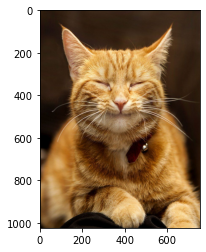

In [7]:
img = plt.imread('Image_ML/cat/1.jpg')
plt.imshow(img)

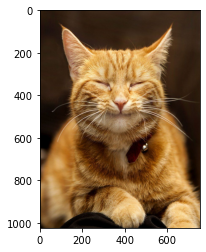

In [8]:
edges = filters.sobel(img)
plt.imshow(img)

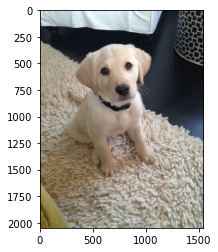

In [9]:
img = plt.imread('Image_ML/dog/2.jpg')
plt.imshow(img)

In [5]:
from skimage import io, filters

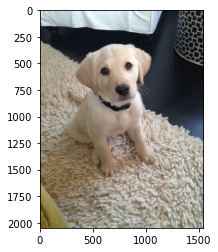

In [10]:
edges = filters.sobel(img)
plt.imshow(img)

In [11]:
def load_image_files(container_path, dimension=(64, 64)):
    
    """Loading Multiple Images From the Folder and Which Consists  of Different Shape of Data We Have to Bring them in 64 ,64 Shape
    as well as 
    Parameters
    ----------
    container_path : string or unicode of images in the SubFolders Path to the main folder holding one subfolder[Cat,Dog] 
    Each and Every category[Cat, Dog]
    Dimensions: We Have Bring Ddifferent Images into Same equal shape
    """
    image_dir = Path(container_path)
    folders = [directory for directory in image_dir.iterdir() if directory.is_dir()]
    categories = [fo.name for fo in folders]

    descr ="""cat and Dog Image Classification Problem"""
    
    images = []
    flat_data = []
    target = []
    
    for i,direc in enumerate(folders):
        for file in direc.iterdir():
            img = skimage.io.imread(file)
            plt.imshow(img)
            #plt.show()
            
            # Convert Image Sahpe in 64 ,64
            img_resized =resize(img, dimension, anti_aliasing=True, mode='reflect')
            plt.imshow(img_resized)
            flat_data.append(img_resized.flatten())
            images.append(img_resized)
            target.append(i)
    flat_data = np.array(flat_data)
    target = np.array(target)
    images = np.array(images)
    return Bunch(data=flat_data,
                target=target,
                target_name = categories,
                images= images,
                DESCR =descr )

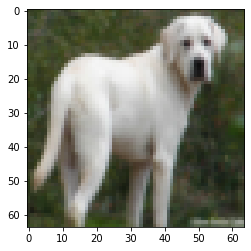

In [12]:
import skimage
image_dataset = load_image_files("Image_ML")

In [13]:
image_dataset.keys()

dict_keys(['data', 'target', 'target_name', 'images', 'DESCR'])

In [14]:
image_dataset.data

array([[0.1828125 , 0.11372549, 0.0573223 , ..., 0.65306373, 0.5314951 ,
        0.36211703],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99129902],
       [0.99215686, 0.99215686, 0.99215686, ..., 0.99215686, 0.99215686,
        0.99215686],
       ...,
       [0.87331495, 0.8828125 , 0.90242034, ..., 0.90196078, 0.91372549,
        0.93333333],
       [0.45490196, 0.4627451 , 0.34901961, ..., 0.1254902 , 0.0745098 ,
        0.04803922],
       [0.20784314, 0.24485294, 0.13504902, ..., 0.45765931, 0.51053922,
        0.42394684]])

In [15]:
image_dataset.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [16]:
image_dataset.target_name

['cat', 'dog']

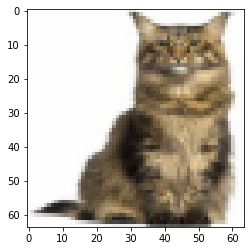

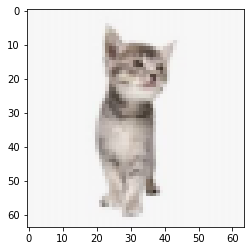

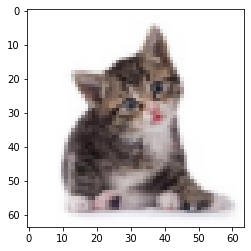

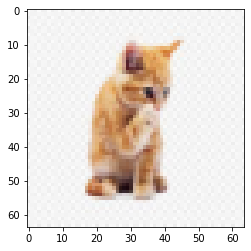

In [17]:
for I in range(6,10):
    plt.imshow(image_dataset.images[I])
    plt.show()

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
x_train,x_test,y_train,y_test = train_test_split(image_dataset.data,image_dataset.target,random_state=1,test_size=0.3)
x_train.shape

(102, 12288)

In [20]:
Train_file = pd.DataFrame(x_train)

In [21]:
Train_file['Target'] = y_train

In [22]:
Train_file.to_csv('Train.csv')

In [23]:
x_test.shape

(45, 12288)

In [24]:
Test_file = pd.DataFrame(x_test)

In [25]:
Test_file['Target'] = y_test

In [26]:
Test_file.to_csv('Test.csv')

In [27]:
x_train.shape[0] != y_test.shape[0]

True

In [28]:
y_train.shape

(102,)

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

In [30]:
Lr = LogisticRegression(max_iter=300)
GS = GridSearchCV(Lr, param_grid={'C':[0.001,0.01,0.1]},
                 scoring='accuracy',
                 cv=5)

In [31]:
GS.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=300),
             param_grid={'C': [0.001, 0.01, 0.1]}, scoring='accuracy')

In [32]:
yhat_prob = GS.predict(x_test)

In [33]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Predication":yhat_prob})

Actual_Data  New_Predication
0             1                0
1             1                1
2             0                0
3             1                1
4             1                1
5             1                1
6             1                1
7             0                0
8             0                1
9             0                1
10            0                0
11            0                1
12            1                1
13            0                0
14            0                0
15            0                1
16            1                1
17            0                0
18            0                0
19            0                0
20            1                1
21            1                1
22            0                0
23            1                1
24            1                1
25            0                0
26            0                0
27            0                0
28            1                0
29            1                1
30            1                1
31            1                1
32            0                0
33            1                0
34            0                0
35            0                0
36            1                1
37            1                1
38            0                0
39            1                1
40            1                1
41            0                0
42            1                1
43            0                0
44            0                0

In [34]:
GS.score(x_train,y_train)

0.9215686274509803

In [35]:
GS.score(x_test,yhat_prob)

1.0

In [36]:
Lr = LogisticRegression(solver='newton-cg',C=1.0,max_iter=100)

In [37]:
Lr.fit(x_train,y_train)

LogisticRegression(solver='newton-cg')

In [38]:
Lr.coef_

array([[ 0.03352481,  0.02367702,  0.00472872, ..., -0.00757967,
         0.0070051 , -0.01048471]])

In [39]:
Lr.intercept_

array([4.41621335])

In [40]:
y_test

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       0])

In [41]:
yhat_prob = Lr.predict_proba(x_test)
yhat_prob

array([[2.95548138e-01, 7.04451862e-01],
       [7.56253201e-05, 9.99924375e-01],
       [9.87157176e-01, 1.28428242e-02],
       [8.08180335e-03, 9.91918197e-01],
       [5.11491079e-04, 9.99488509e-01],
       [1.01074021e-02, 9.89892598e-01],
       [4.48588593e-05, 9.99955141e-01],
       [9.94440790e-01, 5.55920961e-03],
       [1.70772376e-02, 9.82922762e-01],
       [5.49040101e-04, 9.99450960e-01],
       [7.04437649e-01, 2.95562351e-01],
       [1.11915137e-02, 9.88808486e-01],
       [3.44196270e-01, 6.55803730e-01],
       [9.94414418e-01, 5.58558245e-03],
       [5.56534000e-01, 4.43466000e-01],
       [4.10035472e-03, 9.95899645e-01],
       [2.24606367e-03, 9.97753936e-01],
       [8.32077463e-01, 1.67922537e-01],
       [9.95982328e-01, 4.01767191e-03],
       [2.00092156e-01, 7.99907844e-01],
       [8.27176262e-05, 9.99917282e-01],
       [1.23251594e-01, 8.76748406e-01],
       [9.66479673e-01, 3.35203270e-02],
       [1.72810185e-02, 9.82718981e-01],
       [3.584354

In [42]:
Training_score = Lr.score(x_train,y_train)
Training_score

1.0

In [43]:
New_Predication = Lm_predication=Lr.predict(x_test)

In [44]:
Test_score = Lr.score(x_test,New_Predication)

In [45]:
Test_score

1.0

In [46]:
pd.DataFrame({"Actual_Data":y_test,
             "New_Predication":New_Predication})

Actual_Data  New_Predication
0             1                1
1             1                1
2             0                0
3             1                1
4             1                1
5             1                1
6             1                1
7             0                0
8             0                1
9             0                1
10            0                0
11            0                1
12            1                1
13            0                0
14            0                0
15            0                1
16            1                1
17            0                0
18            0                0
19            0                1
20            1                1
21            1                1
22            0                0
23            1                1
24            1                1
25            0                1
26            0                0
27            0                0
28            1                0
29            1                1
30            1                1
31            1                1
32            0                0
33            1                0
34            0                0
35            0                0
36            1                1
37            1                1
38            0                0
39            1                0
40            1                1
41            0                0
42            1                1
43            0                0
44            0                0

In [47]:
from sklearn.naive_bayes import BernoulliNB, ComplementNB,MultinomialNB,GaussianNB

In [48]:
Bnb = BernoulliNB()
Cnb = ComplementNB()
Mnb = MultinomialNB()
Gnb = GaussianNB()

In [49]:
Bnb.fit(x_train,y_train)

BernoulliNB()

In [50]:
Bnb.alpha

1.0

In [51]:
Train_Score = Bnb.score(x_train,y_train)

In [52]:
Train_Score

0.5490196078431373

In [53]:
Bnb_new_prediction = Bnb.predict(x_test)

In [54]:
Test_Score = Bnb.score(x_test,y_test)

In [55]:
Test_Score

0.4888888888888889

In [56]:
Cnb.fit(x_train,y_train)

ComplementNB()

In [57]:
Cnb.alpha

1.0

In [58]:
Train_Score = Cnb.score(x_train,y_train)

In [59]:
Train_Score

0.7352941176470589

In [60]:
Cnb_new_prediction = Cnb.predict(x_test)

In [61]:
Test_Score = Cnb.score(x_test,y_test)

In [62]:
Test_Score

0.7111111111111111

In [63]:
Mnb.fit(x_train,y_train)

MultinomialNB()

In [64]:
Mnb.alpha

1.0

In [65]:
Train_Score = Mnb.score(x_train,y_train)

In [66]:
Train_Score

0.7352941176470589

In [67]:
Mnb_new_prediction = Mnb.predict(x_test)

In [68]:
Test_Score = Mnb.score(x_test,y_test)

In [69]:
Test_Score

0.7111111111111111

In [70]:
Gnb.fit(x_train,y_train)

GaussianNB()

In [71]:
Train_Score = Gnb.score(x_train,y_train)

In [72]:
Train_Score

0.803921568627451

In [73]:
Gnb_new_prediction = Gnb.predict(x_test)

In [74]:
Test_Score = Gnb.score(x_test,y_test)

In [75]:
Test_Score

0.8222222222222222

In [76]:
from sklearn.neighbors import KNeighborsClassifier

In [77]:
Knn = KNeighborsClassifier(n_neighbors=10)

In [78]:
Knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [79]:
Train_score = Knn.score(x_train,y_train)

In [80]:
Train_Score

0.803921568627451

In [81]:
Test_score = Knn.score(x_test,y_test)

In [82]:
Test_score

0.8444444444444444

In [83]:
Knn.classes_

array([0, 1])

In [84]:
Knn.predict_proba(x_train)

array([[0.3, 0.7],
       [0.9, 0.1],
       [0.9, 0.1],
       [1. , 0. ],
       [0. , 1. ],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.2, 0.8],
       [0.4, 0.6],
       [0.1, 0.9],
       [0.1, 0.9],
       [0.8, 0.2],
       [0.8, 0.2],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.7, 0.3],
       [0.3, 0.7],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.4, 0.6],
       [0.7, 0.3],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.6, 0.4],
       [0.2, 0.8],
       [0.7, 0.3],
       [0.1, 0.9],
       [0.1, 0.9],
       [1. , 0. ],
       [0.7, 0.3],
       [0.9, 0.1],
       [0.8, 0.2],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.2, 0.8],
       [0.1, 0.9],
       [0.3, 0.7],
       [0.1, 0.9],
       [0.7, 0.3],
       [0.3, 0.7],
       [0.7,

In [85]:
from sklearn.metrics import jaccard_score
jaccard_score(y_test, New_Predication)

0.6785714285714286

In [86]:
from sklearn.metrics import confusion_matrix,classification_report

In [87]:
print(classification_report(y_test,New_Predication))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.76      0.86      0.81        22

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45



In [88]:
cm  = confusion_matrix(y_test, New_Predication)

In [89]:
print(cm)

[[17  6]
 [ 3 19]]


In [90]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier

In [91]:
est = [('scaler',MinMaxScaler()),
       ('knn',KNeighborsClassifier())]

In [92]:
pipe = Pipeline(est)

In [93]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('scaler', MinMaxScaler()), ('knn', KNeighborsClassifier())])

In [94]:
yhat_prob = pipe.predict(x_test)
yhat_prob

array([0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0])

In [95]:
True_positive = cm[0,0]
True_positive

17

In [96]:
False_negative = cm[0,1]
False_negative

6

In [97]:
False_positive = cm[1,0]
False_positive

3

In [98]:
True_negative = cm[1,1]
True_negative

19

In [99]:
prediction_error = False_positive + False_negative /False_positive + False_negative + True_positive + True_negative

In [100]:
print(prediction_error)

47.0


In [101]:
Accuracy_model = True_positive + True_negative / False_positive + False_negative + True_positive + True_negative

In [102]:
Accuracy_model

65.33333333333333

In [103]:
Overall_model_correction = (0.625*100) + 39.0
Overall_model_correction

101.5

In [104]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="green" if cm[i, j] > thresh else "red")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, New_Predication, labels=[1,0]))


[[19  3]
 [ 6 17]]


Normalized confusion matrix
[[0.86 0.14]
 [0.26 0.74]]


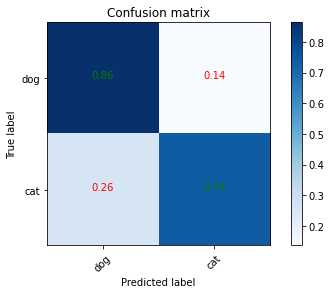

In [105]:
cnf_matrix = confusion_matrix(y_test, New_Predication, labels=[1,0])
np.set_printoptions(precision=2)


# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['dog','cat'],normalize= True,  title='Confusion matrix')


In [106]:
print (classification_report(y_test, New_Predication))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79        23
           1       0.76      0.86      0.81        22

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45



In [107]:
from sklearn.metrics import log_loss
log_loss(y_test, New_Predication)

6.907861891972829

In [108]:
y_pred_proba = Lr.predict_proba(x_test)[::,1]
print(y_pred_proba)
from sklearn import metrics

[7.04e-01 1.00e+00 1.28e-02 9.92e-01 9.99e-01 9.90e-01 1.00e+00 5.56e-03
 9.83e-01 9.99e-01 2.96e-01 9.89e-01 6.56e-01 5.59e-03 4.43e-01 9.96e-01
 9.98e-01 1.68e-01 4.02e-03 8.00e-01 1.00e+00 8.77e-01 3.35e-02 9.83e-01
 9.96e-01 8.11e-01 5.02e-04 3.47e-05 1.89e-01 1.00e+00 9.77e-01 5.17e-01
 2.69e-03 2.91e-01 4.83e-01 3.34e-01 9.98e-01 9.97e-01 1.47e-02 3.07e-02
 1.00e+00 3.86e-03 9.99e-01 1.23e-01 3.74e-01]


In [109]:
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

In [110]:
fpr

array([0.  , 0.  , 0.  , 0.04, 0.04, 0.09, 0.09, 0.17, 0.17, 0.26, 0.26,
       0.48, 0.48, 0.61, 0.61, 1.  ])

In [111]:
tpr

array([0.  , 0.05, 0.27, 0.27, 0.5 , 0.5 , 0.59, 0.59, 0.73, 0.73, 0.86,
       0.86, 0.95, 0.95, 1.  , 1.  ])

In [112]:
_

array([2.00e+00, 1.00e+00, 9.99e-01, 9.99e-01, 9.96e-01, 9.96e-01,
       9.90e-01, 9.83e-01, 8.77e-01, 8.00e-01, 5.17e-01, 2.96e-01,
       1.89e-01, 3.35e-02, 3.07e-02, 3.47e-05])

In [113]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)
auc

0.8517786561264822

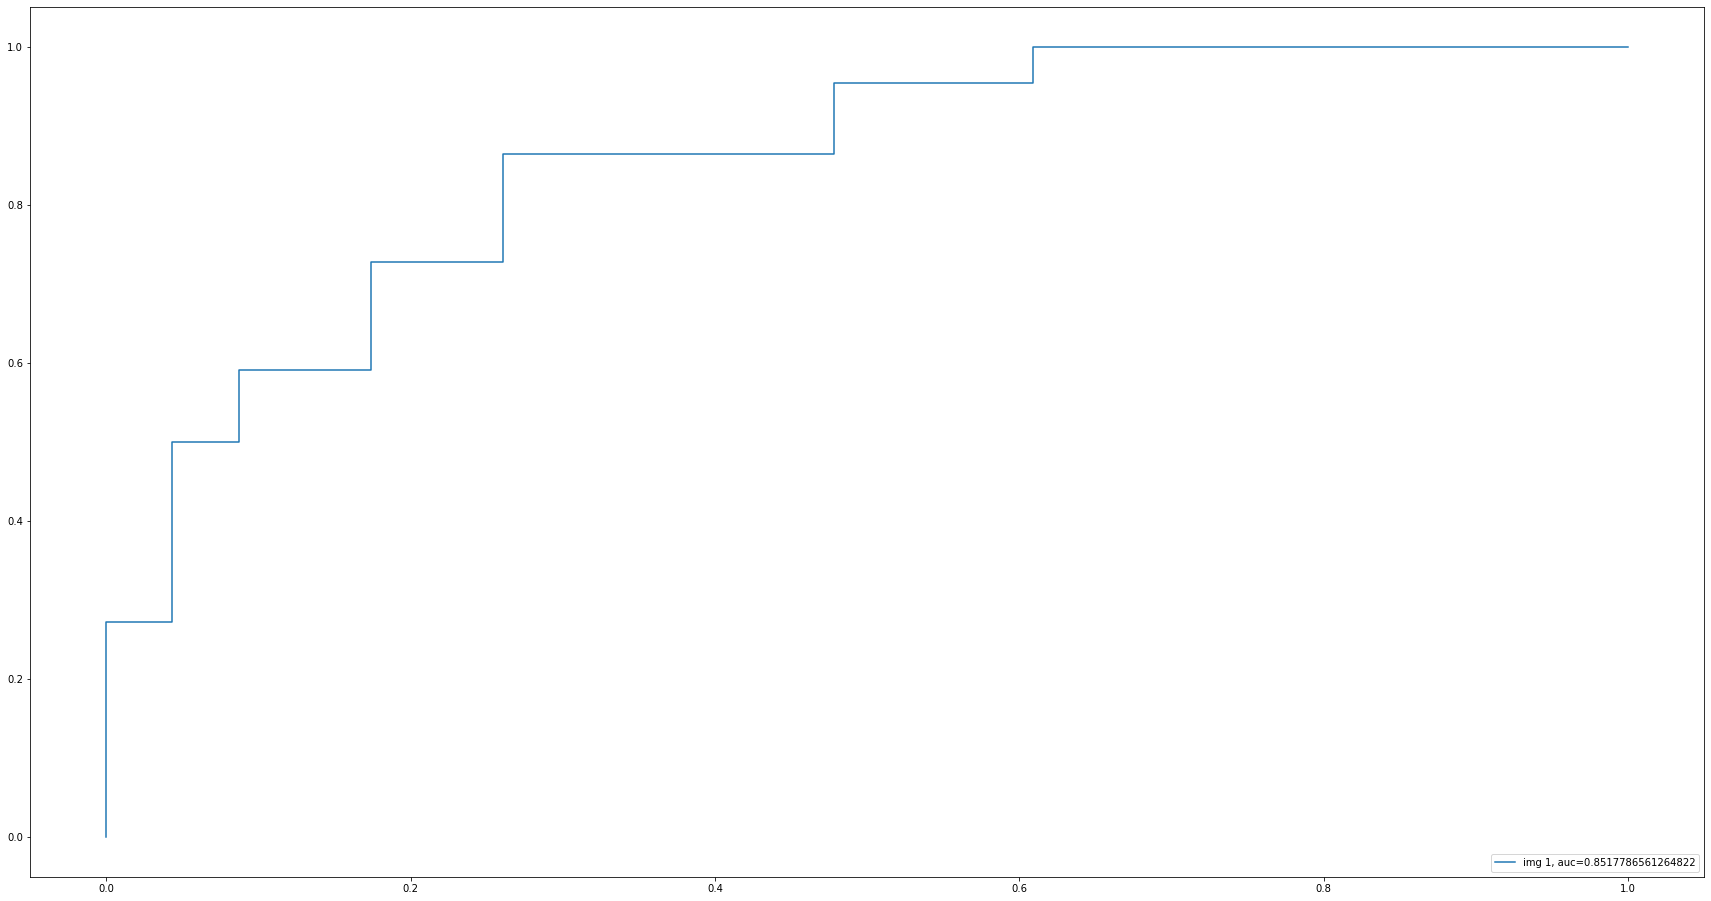

In [114]:
plt.figure(figsize=(30,16))
plt.plot(fpr,tpr,label="img 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()